## **Component 2 :**
# Data Preprocessing and Exploration

# Load the Dataset

In [3]:
# Mount Google Drive to access files stored in Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Read the CSV file using Pandas:
import pandas as pd

# Define the path to the CSV file
file_path = '/content/drive/MyDrive/uber.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Create a copy of data
df = data.copy()

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
# Concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


# Exploratory Data Analysis (EDA)

In [6]:
# View the columns of a DataFrame
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
# Drop invalid columns
df = df.drop(['Unnamed: 0', 'key'], axis= 1)

In [8]:
# Check the dimensions of a DataFrame
df.shape

(200000, 7)

In [9]:
# To get the number of unique values for each column
df.nunique()

,0
fare_amount,1244
pickup_datetime,196629
pickup_longitude,71066
pickup_latitude,83835
dropoff_longitude,76894
dropoff_latitude,90585
passenger_count,8


In [10]:
# To remove duplicate rows from your training dataset
df.drop_duplicates(inplace=True)

In [11]:
# Describe Statistical Summary of Numeric Columns:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [12]:
# To identify and count the number of missing values
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [13]:
# Imputation with Mean:
  # Continuous Data
  # Normal Distribution
  # Small Percentage of Missing Data

# To fill missing values by imputation using mean
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(), inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(), inplace=True)

In [14]:
# Print rows where any column has a value of 0
rows_with_zero = df[(df == 0).any(axis=1)]
print(rows_with_zero)

        fare_amount          pickup_datetime  pickup_longitude  \
7               2.5  2012-12-11 13:52:00 UTC               0.0   
11              8.5  2011-05-23 22:15:00 UTC               0.0   
65              6.0  2014-05-05 19:27:00 UTC               0.0   
92              6.1  2011-12-02 14:07:00 UTC               0.0   
120             6.5  2010-08-20 19:39:48 UTC               0.0   
...             ...                      ...               ...   
199718          4.9  2011-08-19 07:16:00 UTC               0.0   
199724          7.5  2013-10-11 11:25:41 UTC               0.0   
199880          6.5  2014-02-22 06:45:46 UTC               0.0   
199883         12.5  2012-09-10 17:39:00 UTC               0.0   
199963         39.0  2012-09-22 07:46:01 UTC               0.0   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
7                   0.0                0.0               0.0                1  
11                  0.0                0.0     

In [15]:
# Median: the data has outliers, and the zeros represent missing values.

# Impute values with median where they are 0
columns_to_impute = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
for col in columns_to_impute:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)

In [16]:
# Check the data types of each column
df.dtypes

,0
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [17]:
# The data type of 'pickup_datetime' is 'object'.
# so, convert this variable data type to 'datetime'.
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')
df.dtypes

,0
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


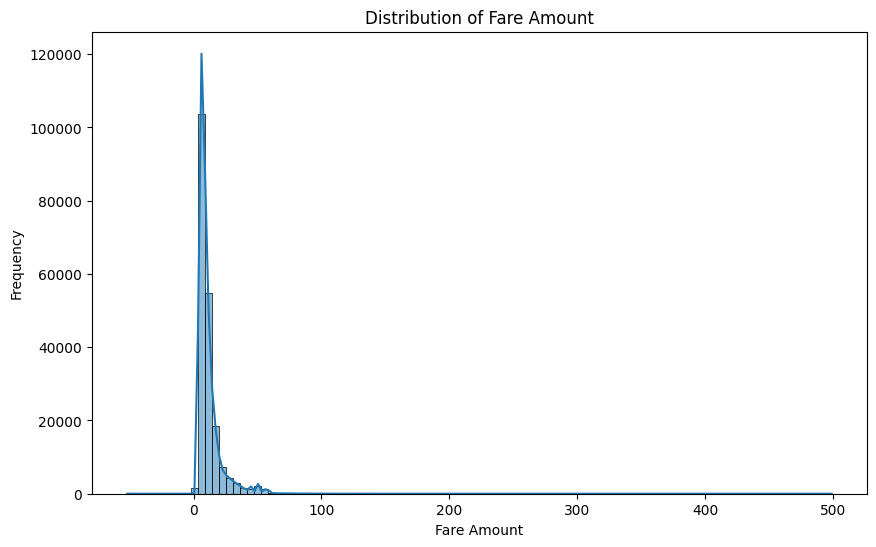

In [18]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of fare_amount
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=100, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

# Feature Extraction

In [19]:
# Feature Extraction
df= df.assign(hour = df.pickup_datetime.dt.hour,
              day= df.pickup_datetime.dt.day,
              month = df.pickup_datetime.dt.month,
              year = df.pickup_datetime.dt.year,
              day_of_week = df.pickup_datetime.dt.dayofweek)

In [20]:
# After Feature extraction this column becomes redundent
df = df.drop('pickup_datetime',axis=1)

In [21]:
# Import numpy library
import numpy as np
# Function to calculate the Haversine distance between two GPS coordinates
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of Earth in kilometers
    return c * r

# Calculate distance using the haversine formula
df['distance_km'] = haversine(df['pickup_longitude'], df['pickup_latitude'],
                              df['dropoff_longitude'], df['dropoff_latitude'])

# Extract another feature Weekend
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [22]:
# Generate descriptive statistics for each column with transpose
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,200000.0,11.359955,9.901776,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,200000.0,-73.928114,5.415208,-1340.648410,-73.992065,-73.981823,-73.968676,57.418457
pickup_latitude,200000.0,40.706517,5.372730,-74.015515,40.736808,40.752592,40.767158,1644.421482
dropoff_longitude,200000.0,-73.917597,8.436509,-3356.666300,-73.991407,-73.980093,-73.965862,1153.572603
dropoff_latitude,200000.0,40.689640,3.955523,-881.985513,40.735823,40.753042,40.768001,872.697628
passenger_count,200000.0,1.684535,1.385997,0.000000,1.000000,1.000000,2.000000,208.000000
hour,200000.0,13.491335,6.515531,0.000000,9.000000,14.000000,19.000000,23.000000
day,200000.0,15.704670,8.687409,1.000000,8.000000,16.000000,23.000000,31.000000
month,200000.0,6.281795,3.438925,1.000000,3.000000,6.000000,9.000000,12.000000
year,200000.0,2011.742440,1.856397,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


# Handling Outliers

<Axes: >

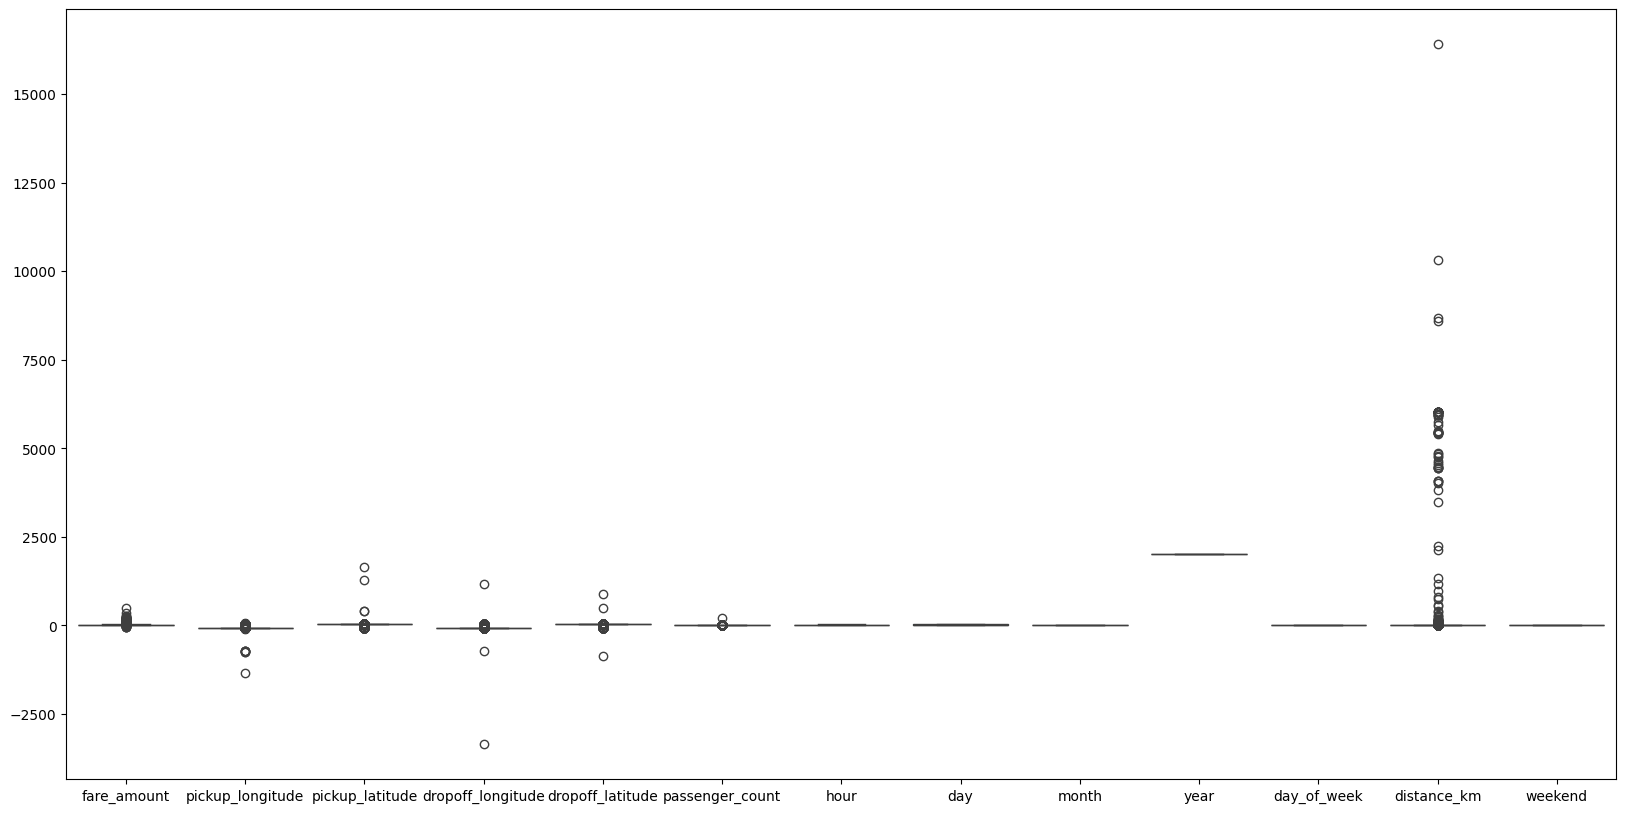

In [23]:
# Discovering Outliers
# 1) Amount < -52
# 2) Trips with travel distance less than or equal to 0, and more than 130Kms
# 3) Trips where 90 < latitude < -90, 180 < longitude < -180

# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(20,10))
sns.boxplot(data= df)

In [24]:
# Imputing Outliers
import numpy as np

def impute_outliers(df1, col):
    # Calculate quartiles and IQR
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_below = df1[col] < lower_bound
    outliers_above = df1[col] > upper_bound

    # Impute outliers with the lower and upper bounds
    df1.loc[outliers_below, col] = lower_bound
    df1.loc[outliers_above, col] = upper_bound

    return df1

def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = impute_outliers(df1, c)
    return df1

In [25]:
# Apply imputation on dataframe
col_list = df.columns
df = treat_outliers_all(df, col_list)

<ipython-input-24-6acc073bceeb>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[outliers_below, col] = lower_bound
<ipython-input-24-6acc073bceeb>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-14.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df1.loc[outliers_below, col] = lower_bound
<ipython-input-24-6acc073bceeb>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2005.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df1.loc[outliers_below, col] = lower_bound
<ipython-input-24-6acc073bceeb>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in 

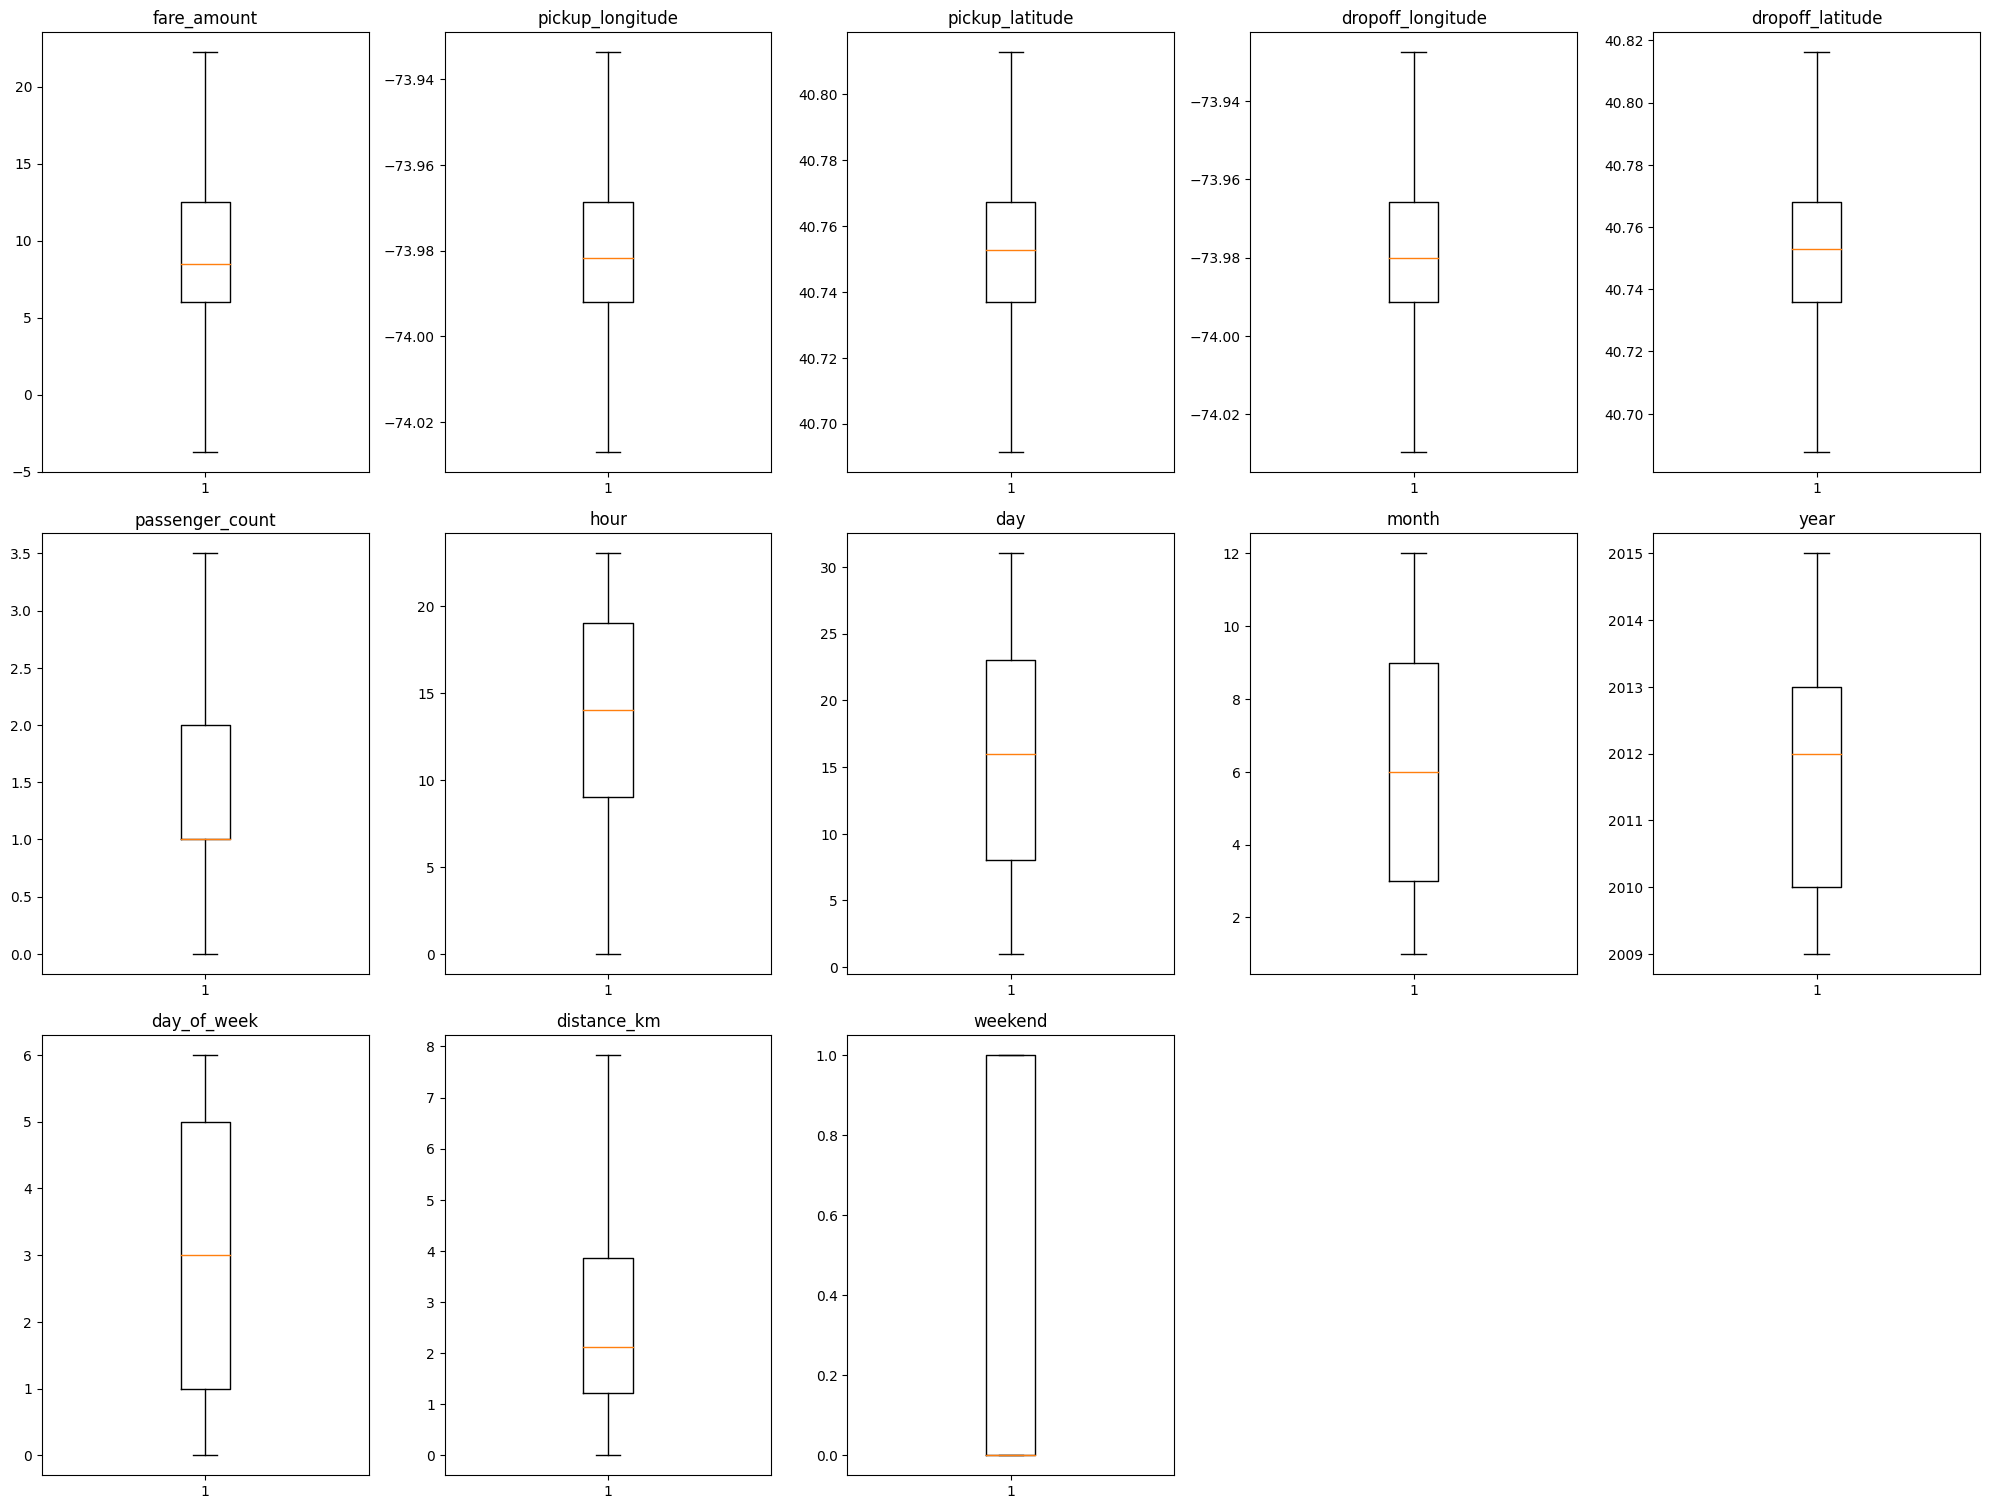

In [26]:
# Boxplot visualization
plt.figure(figsize=(20,30))
for i , variable in enumerate(df.iloc[: , 0::]):
    plt.subplot(6,5,i+1)
    plt.boxplot(df[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [27]:
# Fare amount should be >=0
df = df.loc[(df.fare_amount >= 0)]

In [28]:
# Verify after handling Outliers
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,199983.0,10.082283,5.439023,0.000000,6.000000,8.500000,12.500000,22.250000
pickup_longitude,199983.0,-73.979476,0.018908,-74.027148,-73.992065,-73.981823,-73.968677,-73.933593
pickup_latitude,199983.0,40.751560,0.023704,40.691283,40.736808,40.752592,40.767158,40.812683
dropoff_longitude,199983.0,-73.977555,0.020893,-74.029724,-73.991407,-73.980093,-73.965860,-73.927545
dropoff_latitude,199983.0,40.751580,0.026612,40.687555,40.735824,40.753042,40.768001,40.816269
passenger_count,199983.0,1.514334,0.876698,0.000000,1.000000,1.000000,2.000000,3.500000
hour,199983.0,13.491277,6.515483,0.000000,9.000000,14.000000,19.000000,23.000000
day,199983.0,15.704990,8.687489,1.000000,8.000000,16.000000,23.000000,31.000000
month,199983.0,6.282049,3.438939,1.000000,3.000000,6.000000,9.000000,12.000000
year,199983.0,2011.742363,1.856315,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


In [29]:
# Check the dimensions of a DataFrame
df.shape

(199983, 13)

# Correlation Analysis

In [30]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.151777        -0.112342   
pickup_longitude      0.151777          1.000000         0.450280   
pickup_latitude      -0.112342          0.450280         1.000000   
dropoff_longitude     0.219200          0.364203         0.190859   
dropoff_latitude     -0.129299          0.208384         0.461892   
passenger_count       0.015882         -0.013357        -0.014946   
hour                 -0.023607          0.011825         0.032585   
day                   0.004443         -0.003697        -0.001534   
month                 0.030640          0.001520         0.001187   
year                  0.141429          0.008071        -0.012208   
day_of_week           0.013604         -0.026515        -0.045388   
distance_km           0.848612          0.149909        -0.102815   
weekend               0.004517         -0.023229        -0.048502   

                   dropoff_longit

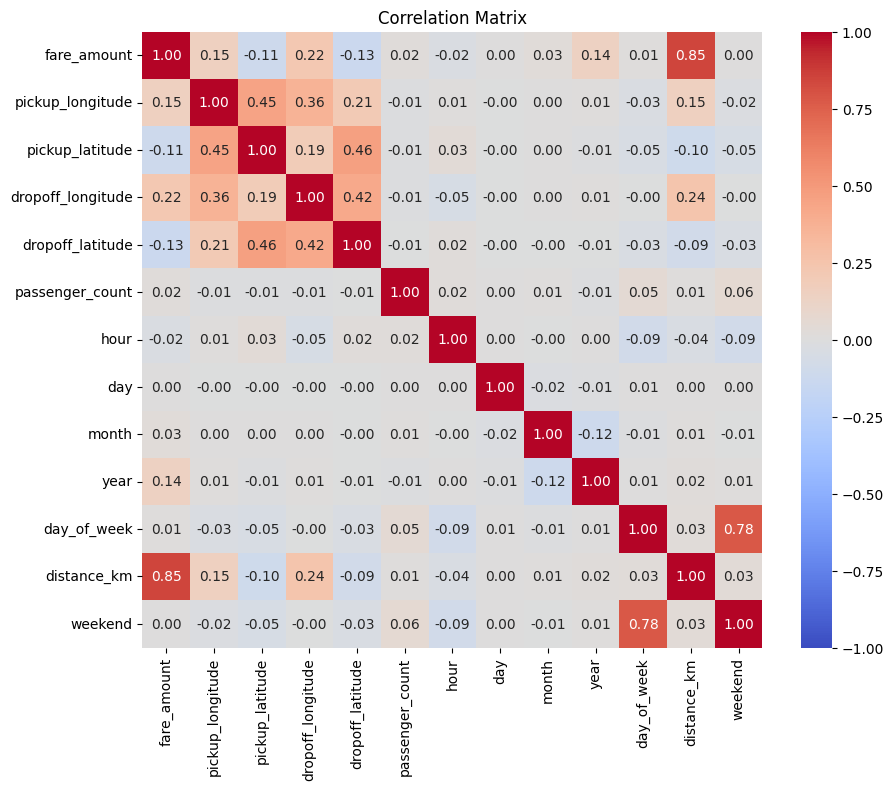

In [31]:
# Visualize the Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)

# Set the title and show the plot
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Check correlations with the target variable (fare_amount)
target_correlation = correlation_matrix['fare_amount']
print(target_correlation.sort_values(ascending=False))

fare_amount          1.000000
distance_km          0.848612
dropoff_longitude    0.219200
pickup_longitude     0.151777
year                 0.141429
month                0.030640
passenger_count      0.015882
day_of_week          0.013604
weekend              0.004517
day                  0.004443
hour                -0.023607
pickup_latitude     -0.112342
dropoff_latitude    -0.129299
Name: fare_amount, dtype: float64




---



# Standardization

In [33]:
# Standardization
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
df_scaled = scaler.fit_transform(df)

# Convert the scaled NumPy array back to a pandas DataFrame
df = pd.DataFrame(df_scaled, columns=df.columns)  # Keep original column names

In [34]:
# Check basic statistics after scaling
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week,distance_km,weekend
count,1.999830e+05,1.999830e+05,1.999830e+05,1.999830e+05,1.999830e+05,1.999830e+05,1.999830e+05,1.999830e+05,1.999830e+05,1.999830e+05,1.999830e+05,1.999830e+05,1.999830e+05
mean,-9.888043e-17,5.119945e-14,-3.622701e-14,4.878229e-13,-3.560852e-13,1.112094e-16,2.167340e-17,-7.354742e-18,-7.964085e-17,4.727842e-14,-4.292043e-17,-4.208902e-16,7.702938e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.853698e+00,-2.521338e+00,-2.542941e+00,-2.496998e+00,-2.405923e+00,-1.727319e+00,-2.070654e+00,-1.692667e+00,-1.535957e+00,-1.477320e+00,-1.565752e+00,-1.289888e+00,-6.289934e-01
25%,-7.505564e-01,-6.658203e-01,-6.223308e-01,-6.629986e-01,-5.921073e-01,-5.866727e-01,-6.893255e-01,-8.869087e-01,-9.543806e-01,-9.386165e-01,-1.052132e+00,-7.397565e-01,-6.289934e-01
50%,-2.909138e-01,-1.241350e-01,4.354295e-02,-1.214739e-01,5.492535e-02,-5.866727e-01,7.807933e-02,3.395812e-02,-8.201647e-02,1.387898e-01,-2.489213e-02,-3.301548e-01,-6.289934e-01
75%,4.445142e-01,5.711653e-01,6.580485e-01,5.597636e-01,6.170615e-01,5.539733e-01,8.454841e-01,8.397166e-01,7.903477e-01,6.774929e-01,1.002348e+00,4.603227e-01,1.589842e+00
max,2.237120e+00,2.426710e+00,2.578642e+00,2.393668e+00,2.430844e+00,2.264942e+00,1.459408e+00,1.760583e+00,1.662712e+00,1.754899e+00,1.515967e+00,2.260418e+00,1.589842e+00


# Split the Dataset

In [35]:
# Define features and target variable
X = df.drop(columns=['fare_amount'])  # Features
y = df['fare_amount']  # Target variable

In [36]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Print the shapes of the splits
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (159986, 12), (159986,)
Testing set shape: (39997, 12), (39997,)


# Feature Selection

In [37]:
# Feature Selection using Recursive Decision Tree

# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
import pandas as pd
import numpy as np

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=7)

# Initialize Recursive Feature Elimination (RFE) with the decision tree model
rfe = RFE(estimator=model, n_features_to_select=1)  # Set to 1 to get the ranking of all features

# Fit RFE
rfe.fit(X_train, y_train)

# Create a DataFrame to show feature rankings
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print(feature_ranking)

              Feature  Ranking
10        distance_km        1
3    dropoff_latitude        2
2   dropoff_longitude        3
0    pickup_longitude        4
1     pickup_latitude        5
8                year        6
6                 day        7
5                hour        8
7               month        9
9         day_of_week       10
4     passenger_count       11
11            weekend       12


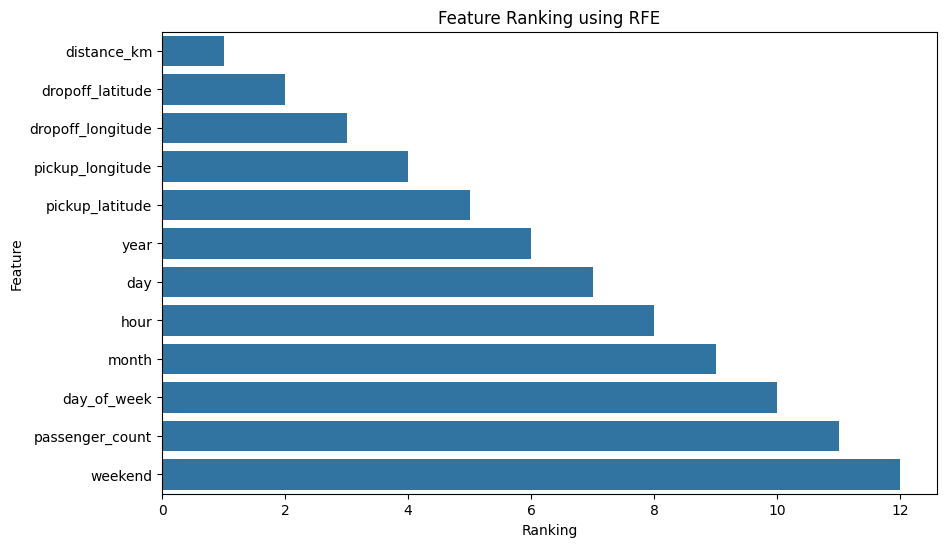

In [38]:

import matplotlib.pyplot as plt
# Plot the feature rankings
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=feature_ranking)
plt.title('Feature Ranking using RFE')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.show()


In [39]:
# Select top 5 features
top_features = feature_ranking['Feature'][:5].tolist()

# Update X_train and X_test with top 5 features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

X_train = X_train_top
X_test = X_test_top

In [40]:
# Select one feature for SVM
one_feature = feature_ranking['Feature'][:1].tolist()
print(one_feature)

X_train_one = X_train[one_feature]
X_test_one = X_test[one_feature]

['distance_km']


# Applying Regression Models

Root Mean Squared Error (RMSE): 0.5233882119978517
Mean Absolute Error (MAE): 0.3549751877989272
R-squared (R²): 0.7252535964004369


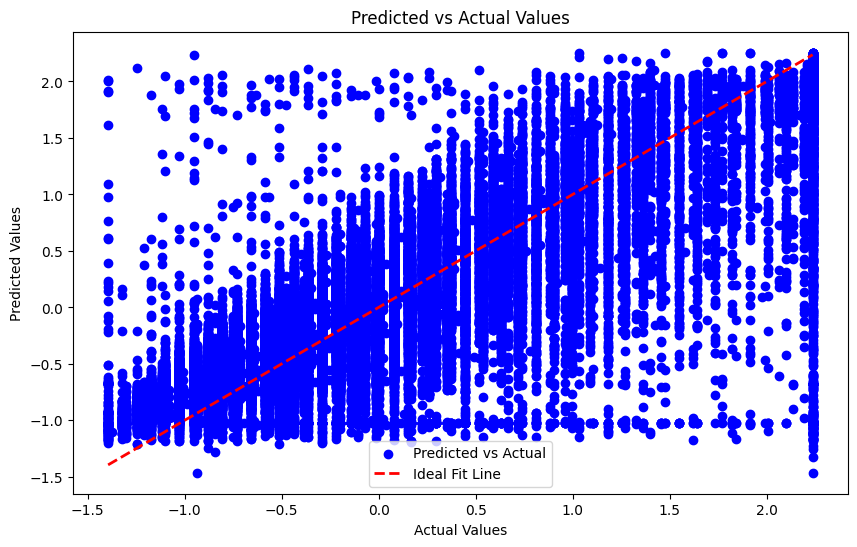

In [41]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Plotting Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

Root Mean Squared Error (RMSE): 0.5164829374419744
Mean Absolute Error (MAE): 0.34704633265987656
R-squared (R²): 0.7324554555319458


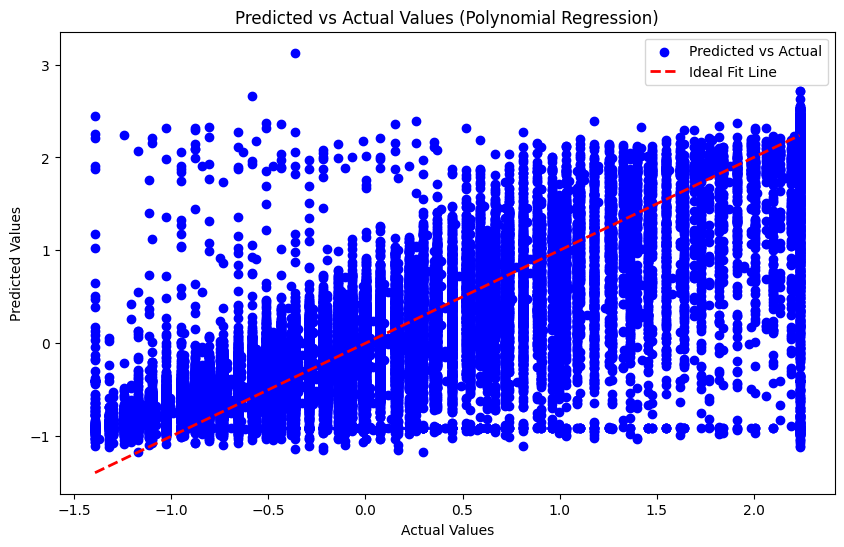

In [42]:
# Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Transform the features to polynomial features
degree = 2  # Change degree as needed
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on polynomial features
model.fit(X_train_poly, y_train)

# Make predictions on the polynomial test features
y_pred = model.predict(X_test_poly)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Plotting Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Polynomial Regression)')
plt.legend()
plt.show()

Root Mean Squared Error (RMSE): 0.5233882362724597
Mean Absolute Error (MAE): 0.3549763718138768
R-squared (R²): 0.725253570915104


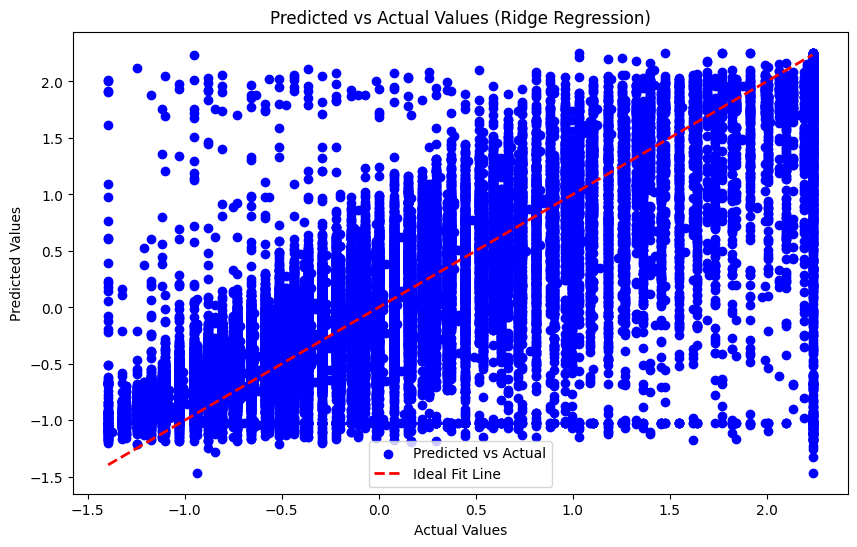

In [43]:
# Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Ridge Regression model
model = Ridge(alpha=1.0)  # We can adjust the alpha parameter for regularization strength

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Plotting Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Ridge Regression)')
plt.legend()
plt.show()

Root Mean Squared Error (RMSE): 0.6378233449396463
Mean Absolute Error (MAE): 0.4104904665294898
R-squared (R²): 0.5919767001966687


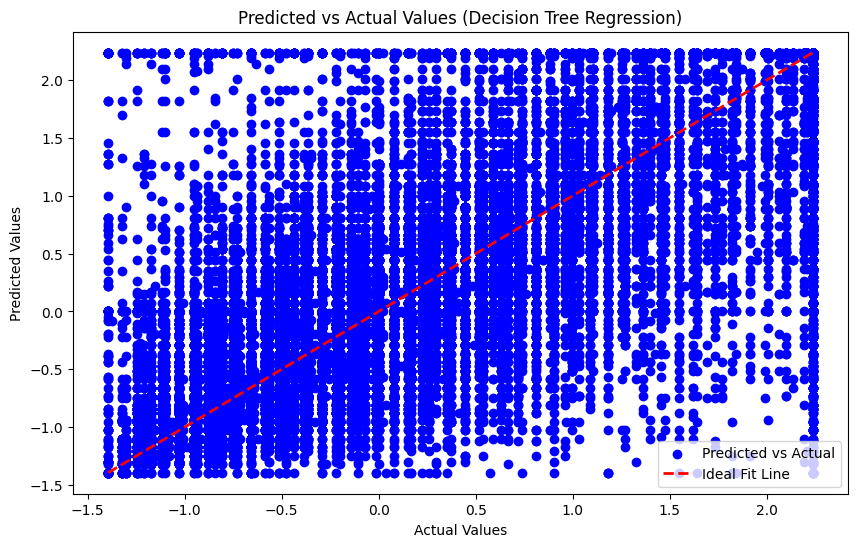

In [46]:
# Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=7)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Plotting Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Decision Tree Regression)')
plt.legend()
plt.show()

Root Mean Squared Error (RMSE): 0.47115401959244585
Mean Absolute Error (MAE): 0.3060492091506313
R-squared (R²): 0.7773565395553911


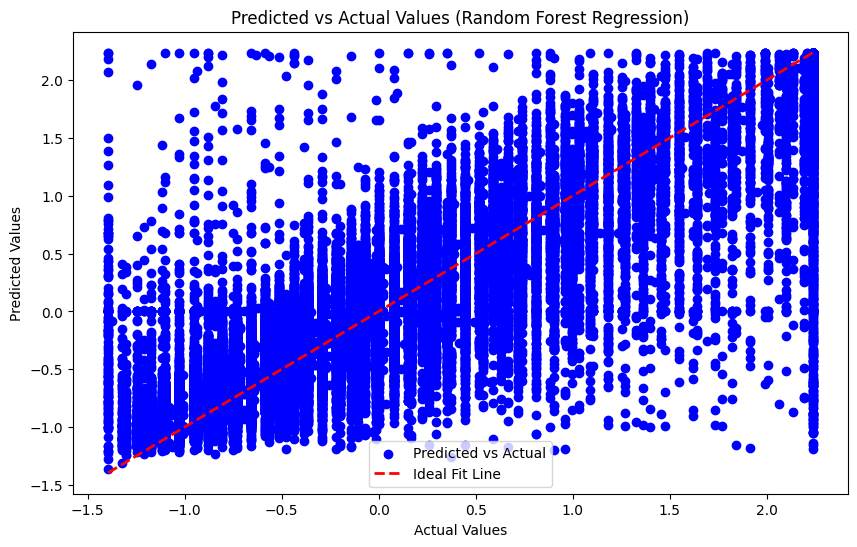

In [47]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=7)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Plotting Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Random Forest Regression)')
plt.legend()
plt.show()

Root Mean Squared Error (RMSE): 0.46353672025652876
Mean Absolute Error (MAE): 0.30447521927449456
R-squared (R²): 0.7844974420760744


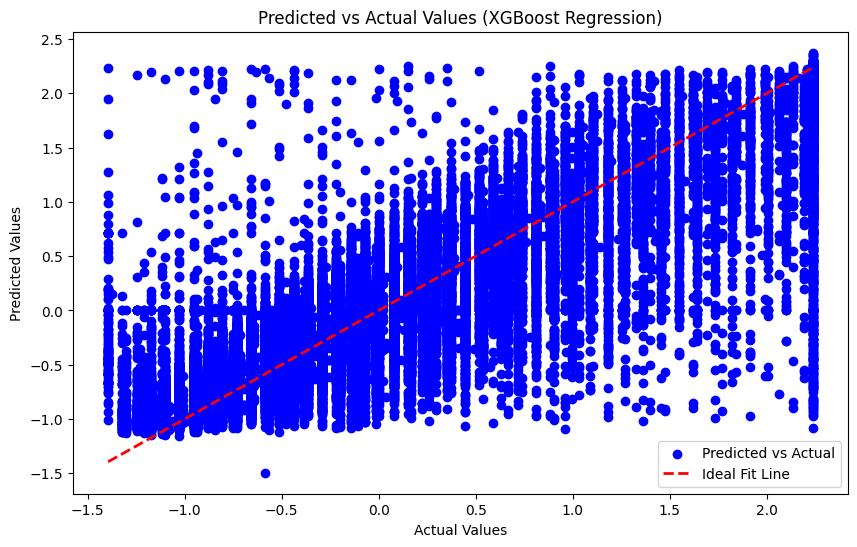

In [49]:
# XGBoost

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the XGBoost Regressor model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=7)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Plotting Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (XGBoost Regression)')
plt.legend()
plt.show()

In [ ]:
# Support Vector Machine

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Support Vector Regression model
model = SVR(kernel='rbf')  # You can try different kernels like 'linear', 'poly', 'rbf'

# Train the model
model.fit(X_train_one, y_train)

# Make predictions
y_pred = model.predict(X_test_one)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Plotting Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Support Vector Regression)')
plt.legend()
plt.show()

In [52]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Create a dictionary to store model results
model_results = {}

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_results['Linear Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R^2': r2_score(y_test, y_pred)
}

# Polynomial Regression
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
model_results['Polynomial Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R^2': r2_score(y_test, y_pred)
}

# Ridge Regression
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_results['Ridge Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R^2': r2_score(y_test, y_pred)
}

# Decision Tree Regression
model = DecisionTreeRegressor(random_state=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_results['Decision Tree Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R^2': r2_score(y_test, y_pred)
}

# Random Forest Regression
model = RandomForestRegressor(n_estimators=100, random_state=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_results['Random Forest Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R^2': r2_score(y_test, y_pred)
}

# XGBoost
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_results['XGBoost Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R^2': r2_score(y_test, y_pred)
}

# Convert the results to a DataFrame for easy comparison
results_df = pd.DataFrame.from_dict(model_results, orient='index')

# Sort the DataFrame by RMSE in ascending order
results_df_sorted = results_df.sort_values('RMSE', ascending=True)

# Print the sorted results
print(results_df_sorted)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


                                  RMSE       MAE           R^2
Linear Regression             0.523388  0.354975  7.252536e-01
Polynomial Regression         0.516483  0.347046  7.324555e-01
Ridge Regression              0.523388  0.354976  7.252536e-01
Lasso Regression              0.998523  0.797344 -9.103263e-07
Elastic Net Regression        0.810968  0.645282  3.403836e-01
Decision Tree Regression      0.637823  0.410490  5.919767e-01
Random Forest Regression      0.471154  0.306049  7.773565e-01
Gradient Boosting Regression  0.479027  0.320195  7.698534e-01
XGBoost Regression            0.463537  0.304475  7.844974e-01
CatBoost Regression           0.471670  0.312942  7.768689e-01
AdaBoost Regression           0.754968  0.645598  4.283356e-01


# Fine-tuning the Model

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Root Mean Squared Error (RMSE): 0.459434036856036
Mean Absolute Error (MAE): 0.29861723033205795
R-squared (R²): 0.7882953120137891


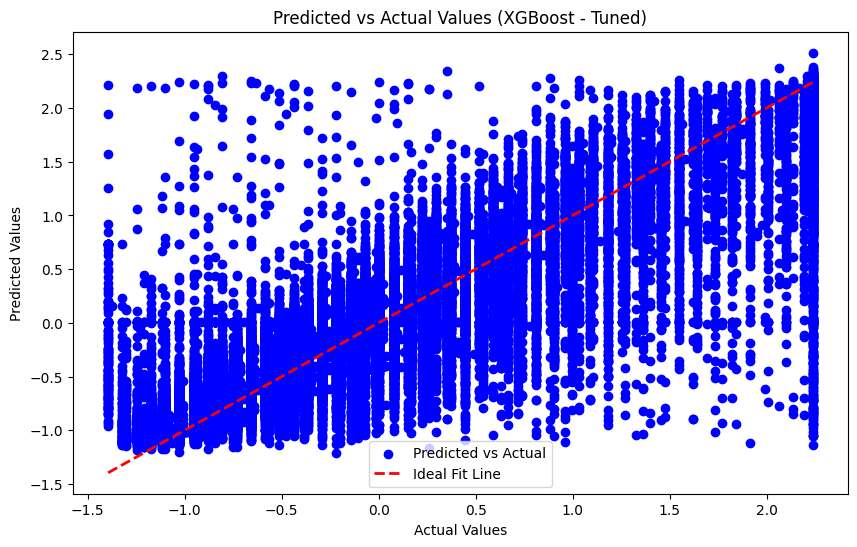

In [56]:
# Fine Tuning the XGBoost Regression Model

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the XGBoost Regressor model
model = XGBRegressor(random_state=7)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [7, 8, 9]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Plotting Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (XGBoost - Tuned)')
plt.legend()
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Root Mean Squared Error (RMSE): 0.481437576346544
Mean Absolute Error (MAE): 0.31788717948321166
R-squared (R²): 0.7675315015912945


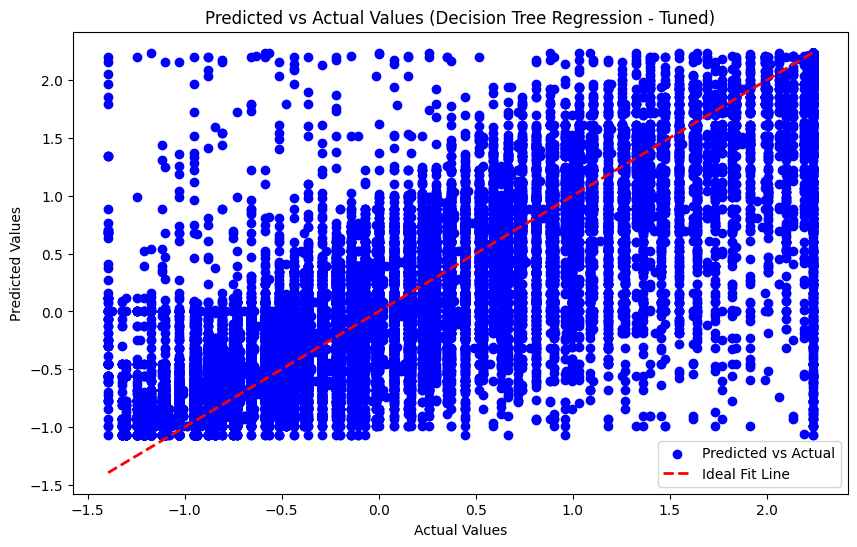

In [57]:
# Fine-tuning Decision Tree Regressor using GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=7)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],          # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 5, 10],         # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt'], # Number of features to consider when looking for the best split
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Decision Tree Regressor with the best parameters
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Plotting Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Decision Tree Regression - Tuned)')
plt.legend()
plt.show()

In [58]:
# Fine-tuning Random Forest Regressor using GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(random_state=7)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],        # Number of features to consider when looking for the best split
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Random Forest Regressor with the best parameters
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Plotting Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Random Forest Regression - Tuned)')
plt.legend()
plt.show()

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}



---

